In [263]:
import sklearn as sk
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.model_selection import LearningCurve

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов
машинного обучения. На основание бизнес-задачи, поставьте задачу
машинного обучения. Подберите дата-сет и оставьте ссылку на него.

In [80]:
dataset = fetch_openml("credit-g")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [81]:
dataset.url

'https://www.openml.org/d/31'

In [82]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [83]:
print(dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Perso

Из описания датасета мы видим, что нашей бизнес-задачей является классификация множества людей в Германии как людей либо с плохим кредитным рейтингом, либо с хорошим. Из этого вытекает задача машинного обучения: бинарная классификация.    
Ссылка на датасет: https://www.openml.org/d/31

# 2. Выполните анализ и обработку дата-сета

## Первичный анализ данных

In [84]:
X = dataset.data
y = dataset.target

In [85]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [86]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

Отсутствующие значения отсутствуют. Убедимся в этом по следующей тепловой карте:

<Axes: >

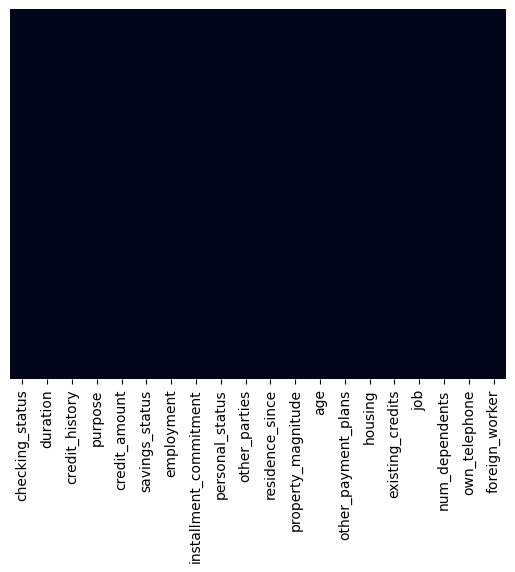

In [88]:
sns.heatmap(X.isnull(), yticklabels=False, cbar=False)

In [89]:
X.describe(exclude=[np.number])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


У категориальных признаков не так уж и много уникальных значений.

In [90]:
X.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


В числовых значениях нет никаких нелогичных значений.

## Предобработка данных

Мы видим, что целевая переменная принимает одно из двух значений (bad, good), потому мы можем заменить эти значения на 0 и 1 для бинарной классификации.

In [91]:
y.replace(to_replace=["bad", "good"], value=[0, 1], inplace=True)

In [92]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

## Разведывательный анализ данных (Exploratory Data Analysis)

<Axes: xlabel='duration', ylabel='Count'>

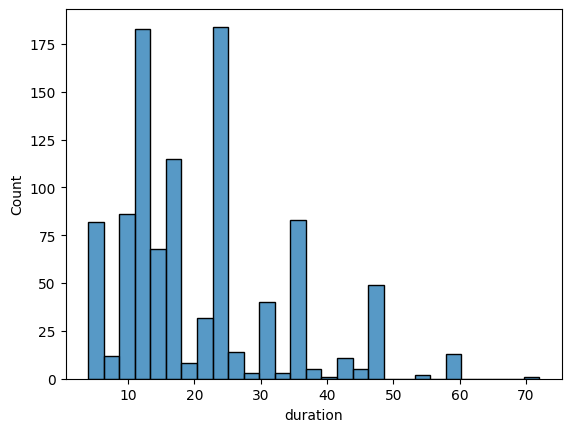

In [93]:
sns.histplot(X.duration)

На данном графике видно, что в основном берут краткосрочные кредиты.

<Axes: xlabel='credit_amount', ylabel='Count'>

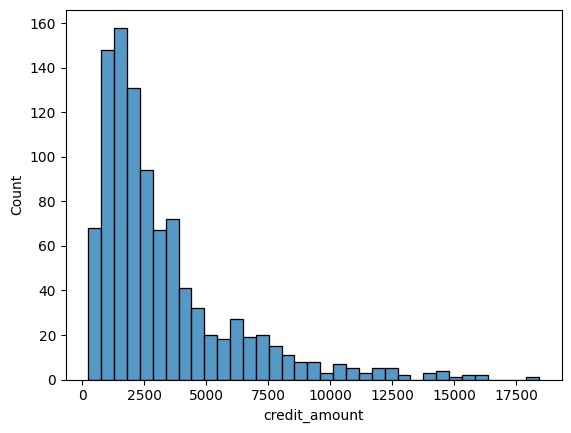

In [94]:
sns.histplot(X.credit_amount)

Также как и на предыдущем графике, люди в основном берут кредиты на малые суммы, чем на большие.

<Axes: xlabel='installment_commitment', ylabel='Count'>

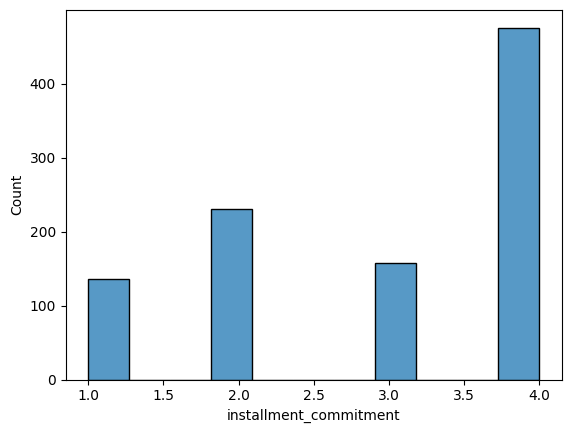

In [95]:
sns.histplot(X.installment_commitment)

На этом графике видно, что кредиты в основном берут под самые большие проценты от дохода.

<Axes: xlabel='residence_since', ylabel='Count'>

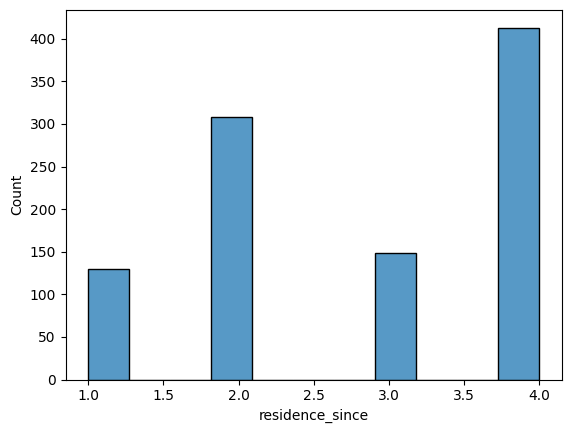

In [96]:
sns.histplot(X.residence_since)

Те, кто живут в Германии дольше всех - чаще берут кредиты.

<Axes: xlabel='age', ylabel='Count'>

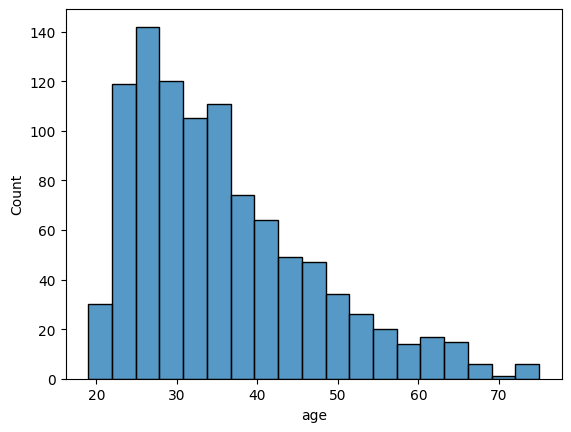

In [97]:
sns.histplot(X.age)

Взять кредит решаются в основном молодые (~27 лет). Меньше всего берёт старое население или совсем молодые.

<Axes: xlabel='existing_credits', ylabel='Count'>

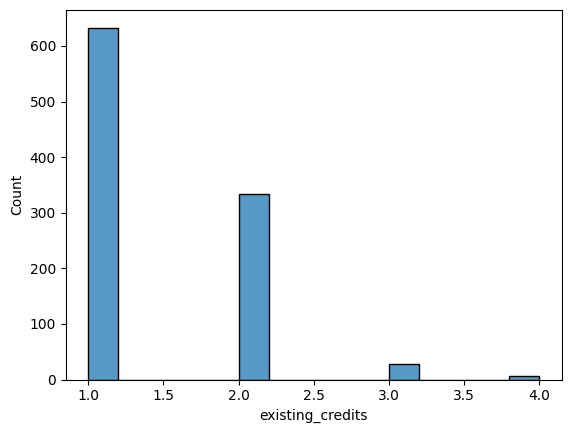

In [98]:
sns.histplot(X.existing_credits)

Кредиты берут либо те, у кого уже есть один, либо 2. 3 и 4 - меньшинство.

<Axes: xlabel='num_dependents', ylabel='Count'>

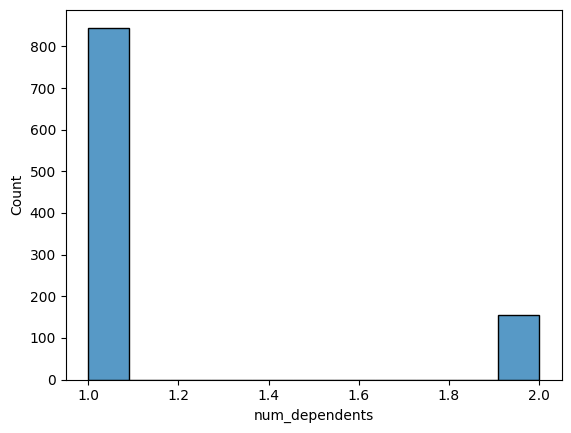

In [99]:
sns.histplot(X.num_dependents)

Взять кредит решаются в основном с одним ребёнком/подопечным. С двумя - сильно меньше, дабы избежать рисков.

Проверим влияние численных атрибутов на целевую переменную.

<Axes: xlabel='duration', ylabel='Density'>

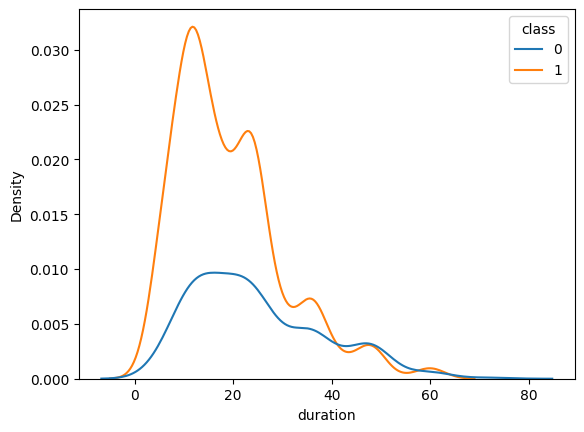

In [100]:
sns.kdeplot(data=X, x="duration", hue=y)

<Axes: xlabel='credit_amount', ylabel='Density'>

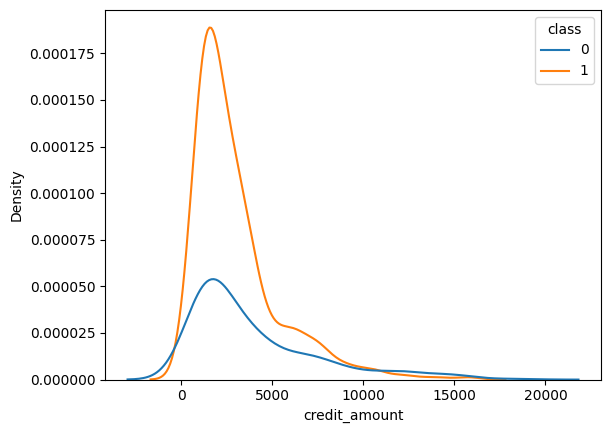

In [101]:
sns.kdeplot(data=X, x="credit_amount", hue=y)

На графике выше наблюдается достаточно длинный "хвост", который может повредить работе модели классификации, ввиду того, что аномальные значения могут попасть в обучающую выборку и переобучить модель, могут исказить метрики точности, параметры модели.

<Axes: xlabel='installment_commitment', ylabel='Density'>

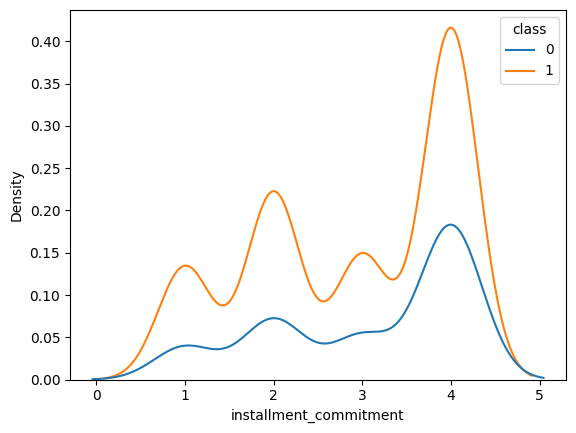

In [102]:
sns.kdeplot(data=X, x="installment_commitment", hue=y)

<Axes: xlabel='residence_since', ylabel='Density'>

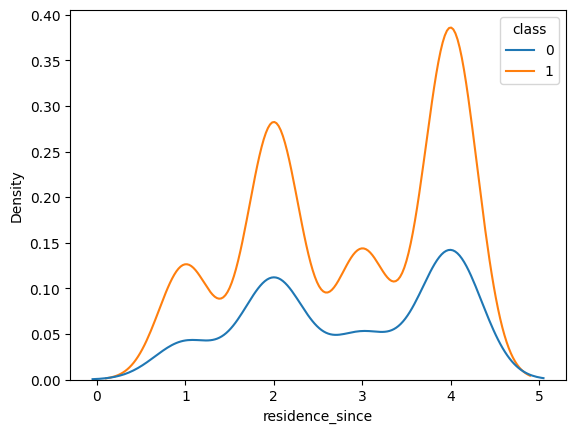

In [103]:
sns.kdeplot(data=X, x="residence_since", hue=y)

<Axes: xlabel='age', ylabel='Density'>

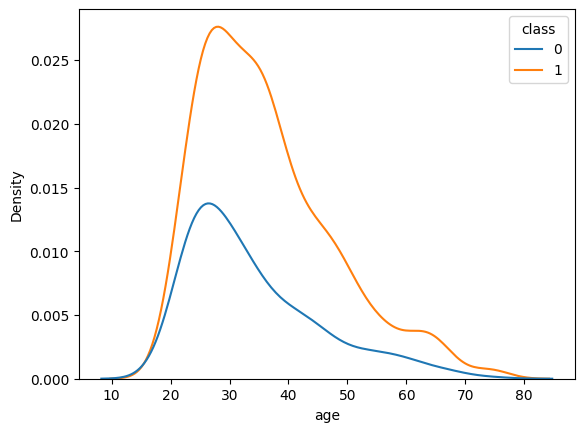

In [104]:
sns.kdeplot(data=X, x="age", hue=y)

<Axes: xlabel='existing_credits', ylabel='Density'>

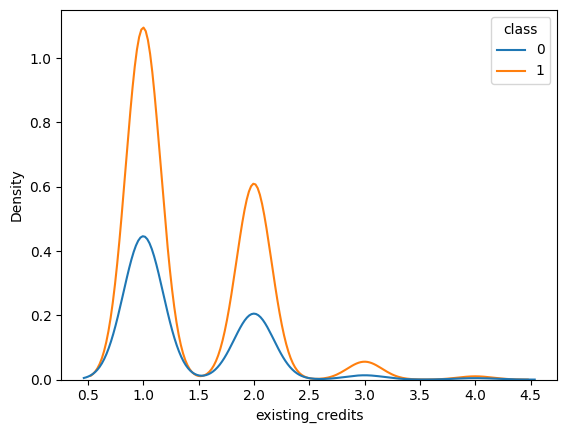

In [105]:
sns.kdeplot(data=X, x="existing_credits", hue=y)

<Axes: xlabel='num_dependents', ylabel='Density'>

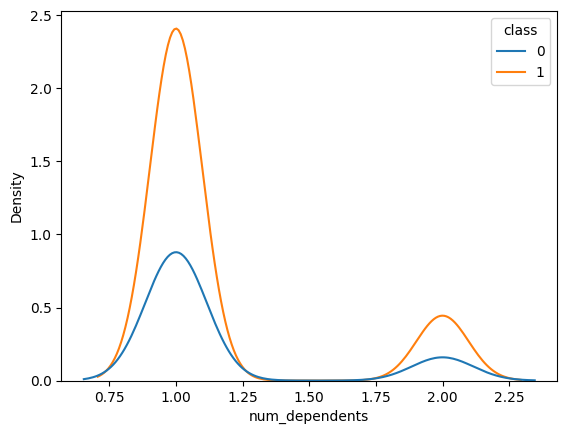

In [106]:
sns.kdeplot(data=X, x="num_dependents", hue=y)

Как можно видеть из графиков выше, изолированно ни один из атрибутов не является критически важным для определения целевой переменной. (ни на одном из графиков нет участков оси x, на котором соотношение линий отличается)    
Из этого можем сделать вывод, что атрибуты, в целом, влияют на целевую переменную больше в совокупности, чем поодиночке.

Разберёмся с экстремальными значениями credit_amount (размер кредита) с помощью клиппинга. Значения более 12500 заменим этим значением.

In [107]:
X.credit_amount[X.credit_amount >= 12500] = 12500

<ipython-input-107-6bb06d1c0c81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.credit_amount[X.credit_amount >= 12500] = 12500


<Axes: xlabel='credit_amount', ylabel='Count'>

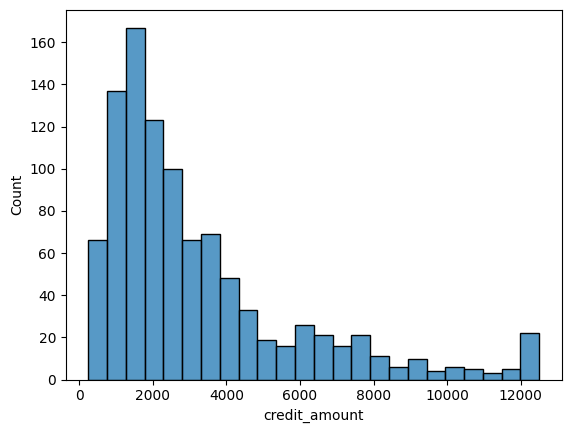

In [108]:
sns.histplot(X.credit_amount)

С численными значениями разобрались, перейдём к категориальным.

In [109]:
X.describe(exclude=[np.number])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


Как видно выше, уникальных значений в каждом из категориальных атрибутов достаточно мало. (3-10)

In [110]:
X.checking_status.value_counts()

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64

По данным выше можно понять, что объектов одной категории сильно меньше, чем других. Людей с большим объёмом денег на счёте меньше всех.

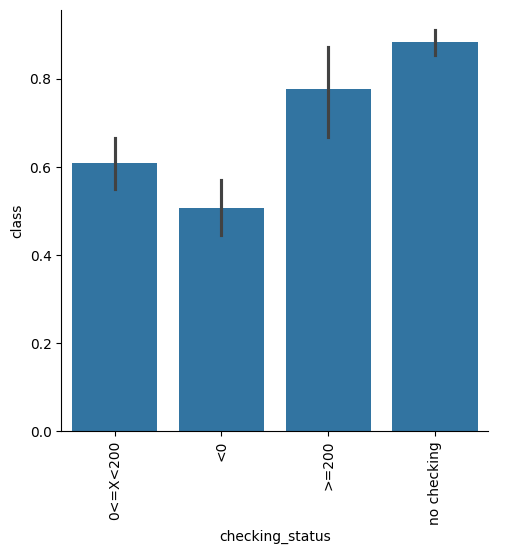

In [111]:
sns.catplot(data=X, x="checking_status", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Меньше всего доверия к тем, у кого денег на счёте совсем нет, либо их мало.

In [112]:
X.credit_history.value_counts()

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

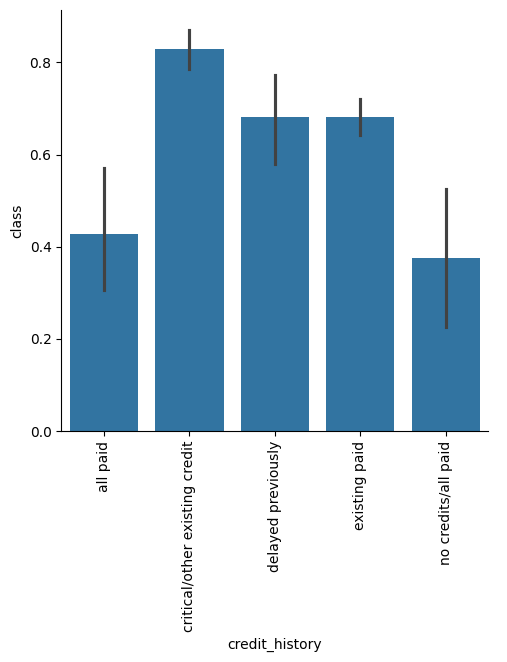

In [113]:
sns.catplot(data=X, x="credit_history", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Как мы видим, по какой-то причине люди с проблемами с кредитной историей и выплатившие существующие кредиты находятся на одном уровне по тому, насколько они хороши для выдачи кредита, одновременно с этим выше тех, кто никогда не брал кредиты или выплатил все кредиты.

In [114]:
X.purpose.value_counts()

purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

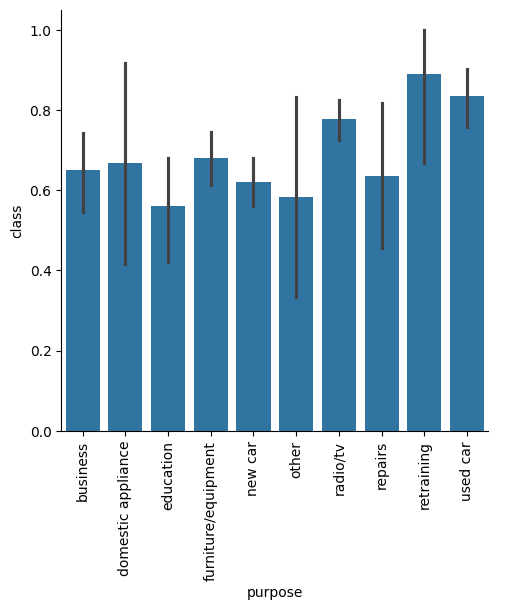

In [115]:
sns.catplot(data=X, x="purpose", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Влияние на целевую переменную по графику выше не слишком понятно. В основном из-за большого разброса у редких причин на взятие кредита. Можно объединить редкие причины кредита в other.

In [116]:
X.savings_status.value_counts()

savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64

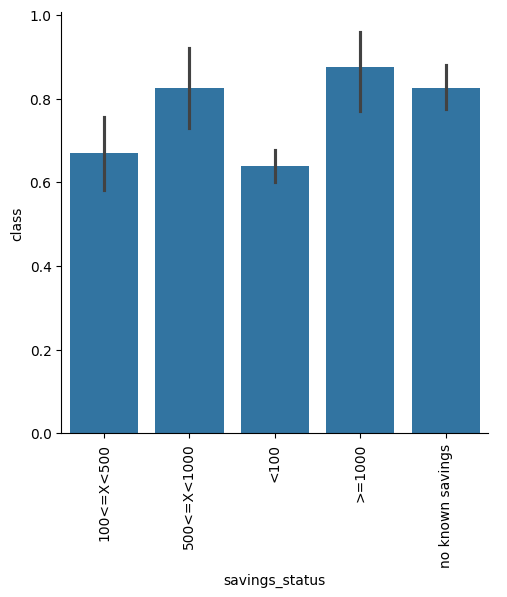

In [117]:
sns.catplot(data=X, x="savings_status", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

По данному графику уже можно понять, что те, у кого есть запас денег выше среднего - более надёжные, чем те, у кого их не много. Также люди с неизвестным запасом денег близки по надёжности к тем, у кого запасов достаточно.

In [118]:
X.employment.value_counts()

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

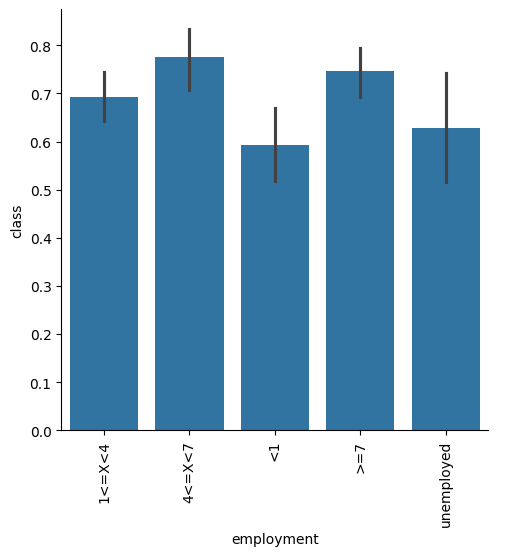

In [119]:
sns.catplot(data=X, x="employment", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Те, кто работают достаточно долго - более надёжны, чем остальные, у безработных же достаточно большой разброс по надёжности.

In [120]:
X.personal_status.value_counts()

personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64

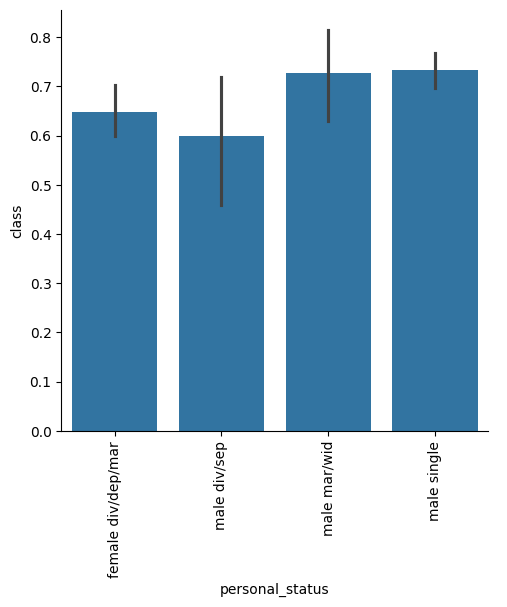

In [121]:
sns.catplot(data=X, x="personal_status", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

По надёжности в приоритете находятся одинокие мужчины либо мужчины в браке. Что женщины в браке/разведённые/одинокие, что разведённые мужчины - менее надёжны.

In [122]:
X.other_parties.value_counts()

other_parties
none            907
guarantor        52
co applicant     41
Name: count, dtype: int64

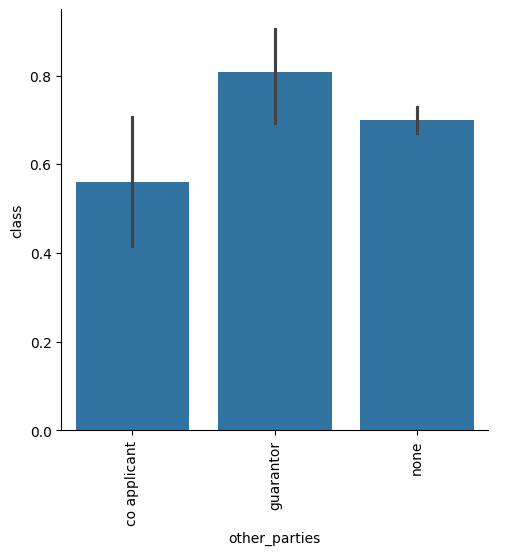

In [123]:
sns.catplot(data=X, x="other_parties", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Видно, что человек с каким либо гарантом выплаты - более надёжный, чем без или берущий кредит с кем-то.

In [124]:
X.property_magnitude.value_counts()

property_magnitude
car                  332
real estate          282
life insurance       232
no known property    154
Name: count, dtype: int64

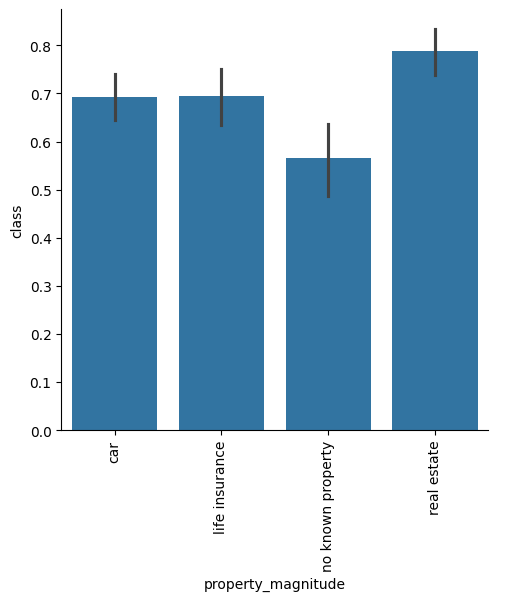

In [125]:
sns.catplot(data=X, x="property_magnitude", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Человек с недвижимостью, машиной или страховкой здоровья - имеют больший шанс на кредит, чем без чего либо из этого списка.

In [126]:
X.other_payment_plans.value_counts()

other_payment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64

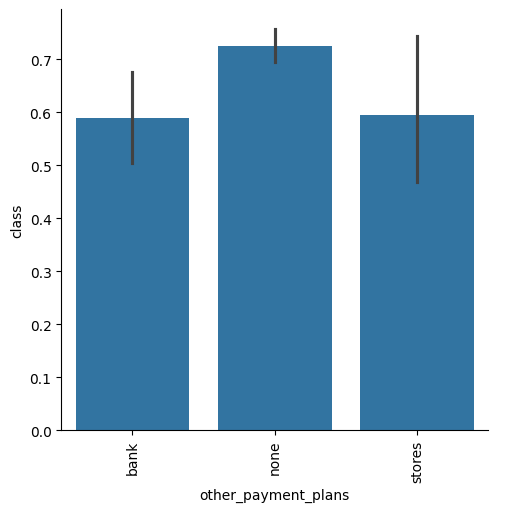

In [127]:
sns.catplot(data=X, x="other_payment_plans", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Если человек хочет другой план оплаты кредита, то он менее надёжен, чем берущий кредит по основному плану выплаты. (% от дохода) Данный атрибут можно бинаризировать, так как основной план выплат самый предпочтительный, а два других - примерно одинаково влияют на надёжность человека.

In [128]:
X.housing.value_counts()

housing
own         713
rent        179
for free    108
Name: count, dtype: int64

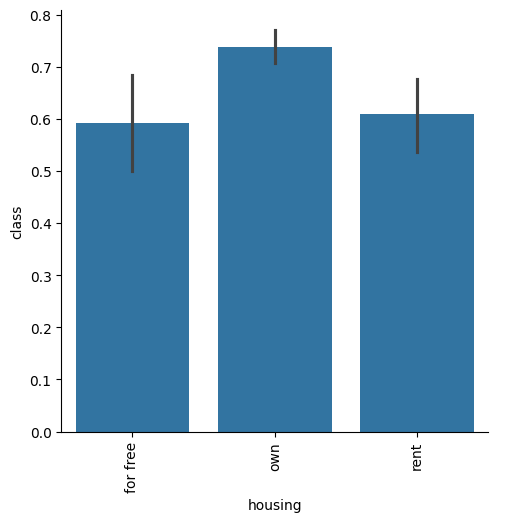

In [129]:
sns.catplot(data=X, x="housing", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Человек, владеющий собственным жильём более надёжный, чем снимающий жильё или живущий за бесплатно. Данный атрибут можно бинаризировать, так как надёжность человека, живущего в бесплатном жилье примерно такая же, как и в арендованном.

In [130]:
X.job.value_counts()

job
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: count, dtype: int64

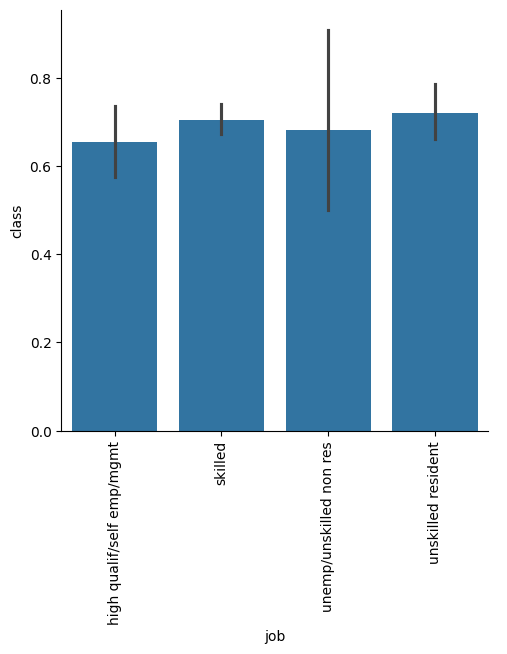

In [131]:
sns.catplot(data=X, x="job", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Влияние на целевую переменную не сильно выражено.

In [132]:
X.own_telephone.value_counts()

own_telephone
none    596
yes     404
Name: count, dtype: int64

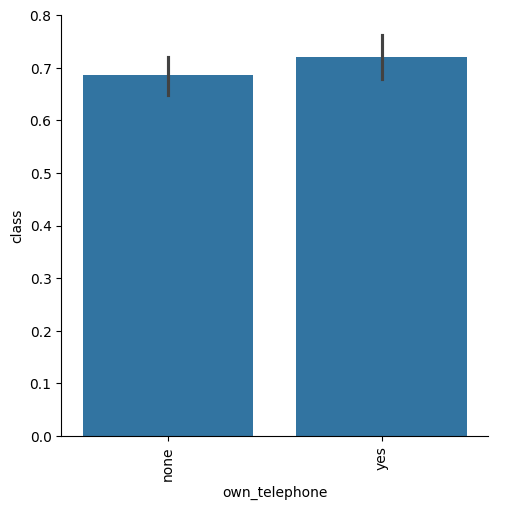

In [133]:
sns.catplot(data=X, x="own_telephone", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Наличие телефона незначительно влияет на надёжность человека. Данный атрибут можно убрать.

In [134]:
X.foreign_worker.value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

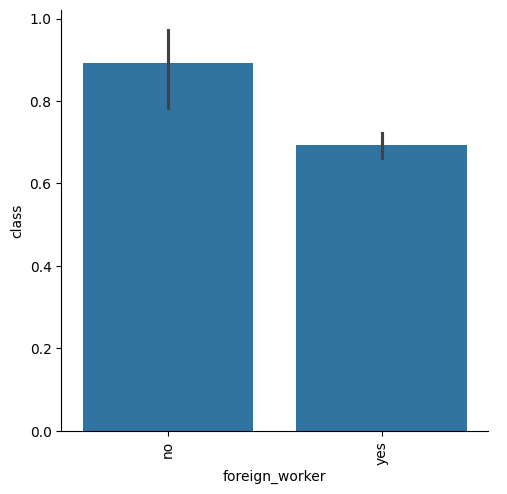

In [135]:
sns.catplot(data=X, x="foreign_worker", y=y, kind="bar")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

Иностранные рабочие намного менее надёжны, чем местные. Однако иностранных - большинство.

## Отбор признаков (Feature selection)

Как мы поняли из предыдущего этапа, все атрибуты нужны. Кроме атрибута own_telephone, от него целевая переменная зависит минимально.

Уберём атрибут own_telephone.

In [136]:
X = X.drop("own_telephone", axis=1)

## Подготовка данных (Data Preparation)

Объединим редкие причины кредита в одну причины. (other)

In [137]:
X.loc[~X["purpose"].isin([
    "radio/tv", "new car", "furniture/equipment", "used car", "business", "education"
    ]), "purpose"] = "other"

In [138]:
X.purpose.value_counts()

purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
other                   55
education               50
domestic appliance       0
repairs                  0
retraining               0
Name: count, dtype: int64

Бинаризируем other_payment_plans.

In [139]:
X["other_payment_plans"].replace(to_replace="none", value=0, inplace=True)
X["other_payment_plans"].replace(to_replace=["bank", "stores"], value=1, inplace=True)

In [140]:
X.other_payment_plans.value_counts()

other_payment_plans
0    814
1    186
Name: count, dtype: int64

Бинаризируем housing.

In [141]:
X["housing"].replace(to_replace="own", value=0, inplace=True)
X["housing"].replace(to_replace=["for free", "rent"], value=1, inplace=True)

In [142]:
X.housing.value_counts()

housing
0    713
1    287
Name: count, dtype: int64

Преобразуем бинарный атрибут foreign_worker.

In [143]:
LE_worker = LabelEncoder()
X.foreign_worker = LE_worker.fit_transform(X.foreign_worker)

Проведём массовое преобразование.

In [144]:
X_dummies = pd.get_dummies(X)

In [145]:
X_dummies.shape

(1000, 56)

In [146]:
X_dummies.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,checking_status_0<=X<200,checking_status_<0,...,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_1,other_payment_plans_0,housing_1,housing_0,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,False,True,...,False,True,False,True,False,True,False,True,False,False
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,True,False,...,False,True,False,True,False,True,False,True,False,False
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,False,False,...,False,True,False,True,False,True,False,False,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,False,True,...,False,False,False,True,True,False,False,True,False,False
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,False,True,...,True,False,False,True,True,False,False,True,False,False


# 3. Выберите несколько метрик для оценки моделей машинного обучения. Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи.

Для данной задачи подходит метрика accuracy для общей оценки точности модели, а также метрика confusion_matrix для оценки шанса неправильно классифицировать надёжность человека.    
confusion_matrix отлично подходит для данной бизнес-задачи, так как классифицировать плохого (ненадёжного) человека как хорошего (надёжного) намного хуже для кредитора, чем классифицировать хорошего как плохого. Всё потому, что потерять большие суммы из-за ненадёжного человека намного больнее для банка, чем не получить сравнительно меньшую прибыль с надёжного человека.

# 4. Постройте 4 модели машинного обучения для решение поставленной задачи.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2)

In [161]:
log_reg = LogisticRegression().fit(X_train, y_train)
kneigh = KNeighborsClassifier().fit(X_train, y_train)
svc = SVC().fit(X_dummies, y).fit(X_train, y_train)
gaus_nb = GaussianNB().fit(X_dummies, y).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
y_pred_reg = log_reg.predict(X_test)
y_pred_kn = kneigh.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_gaus = gaus_nb.predict(X_test)

accuracy_score LogisticRegression:

In [166]:
accuracy_score(y_test, y_pred_reg)

0.81

accuracy_score KNeighborsClassifier:

In [167]:
accuracy_score(y_test, y_pred_kn)

0.675

accuracy_score SVC:

In [168]:
accuracy_score(y_test, y_pred_svc)

0.705

accuracy_score GaussianNB:

In [169]:
accuracy_score(y_test, y_pred_gaus)

0.74

По результатам проверки точности моделей мы выяснили, что лучшая модель по данной метрике - LogisticRegression. Теперь проверим эти модели с помощью confusion_matrix.

confusion_matrix LogisticRegression:

In [173]:
confusion_matrix(y_test, y_pred_reg)

array([[ 37,  22],
       [ 16, 125]])

confusion_matrix KNeighborsClassifier:

In [175]:
confusion_matrix(y_test, y_pred_kn)

array([[ 11,  48],
       [ 17, 124]])

confusion_matrix SVC:

In [176]:
confusion_matrix(y_test, y_pred_svc)

array([[  2,  57],
       [  2, 139]])

confusion_matrix GaussianNB:

In [177]:
confusion_matrix(y_test, y_pred_gaus)

array([[ 43,  16],
       [ 36, 105]])

Из проверки моделей с помощью метрики confusion_matrix мы выяснили, что лучше всех себя показала модель GaussianNB, так как нам важнее правильно классифицировать ненадёжных людей. Потому, даже с меньше точностью, чем у LogisticRegression, GaussianNB проявила себя лучше для поставленной бизнес-задачи.

# 5. Проведите диагностику лучшей модели из пункта 4.

Проведём диагностику модели GaussianNB.

Построим кривую обучения модели.

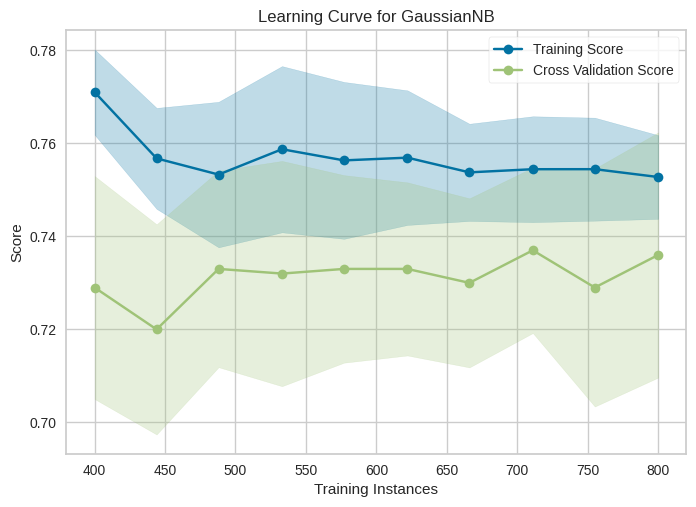

In [192]:
visualizer = LearningCurve(
    GaussianNB(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_dummies, y).show()

Как мы видим, тестовая и обучающая точности практически одинаковы и достаточно высокие, что означает, что модель не переобучена и не недообучена. Можно поискать немного более хороший параметр для нашей модели. (var_smoothing - добавляется к значениям атрибутов)

# 6. Сделайте подбор гиперпараметров для лучшей модели из пункта 4.

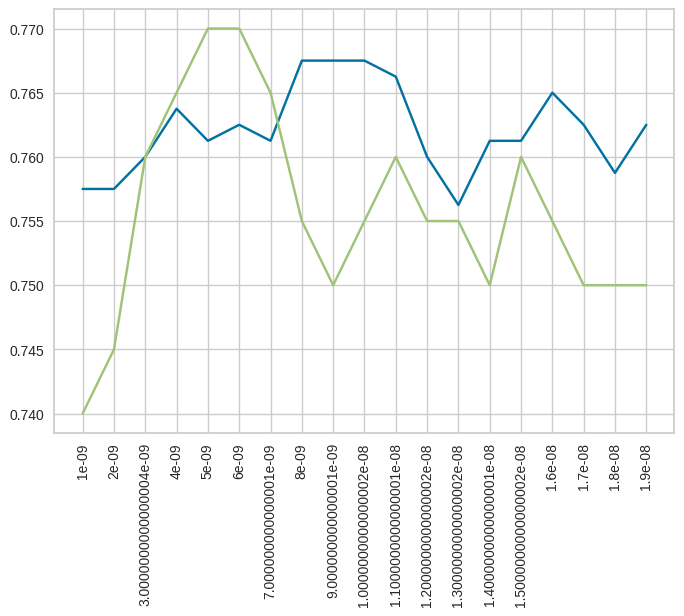

In [203]:
trains = []
tests = []
for i in np.arange(0.000000001, 0.00000002, 0.000000001):
  gaus_nb = GaussianNB(var_smoothing=i).fit(X_train, y_train)
  trains.append(gaus_nb.score(X_train, y_train))
  tests.append(gaus_nb.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
plt.xticks(ticks=range(19), labels=np.arange(0.000000001, 0.00000002, 0.000000001))
plt.xticks(rotation=90)
plt.show()

Как мы видим, лучшим параметром var_smoothing будет ~1.5e-08. Точности по обеим выборкам близки и лучше чем со стандартным параметром. (0.76 > 0.74)

Построим кривую обучения модели с найденым параметром.

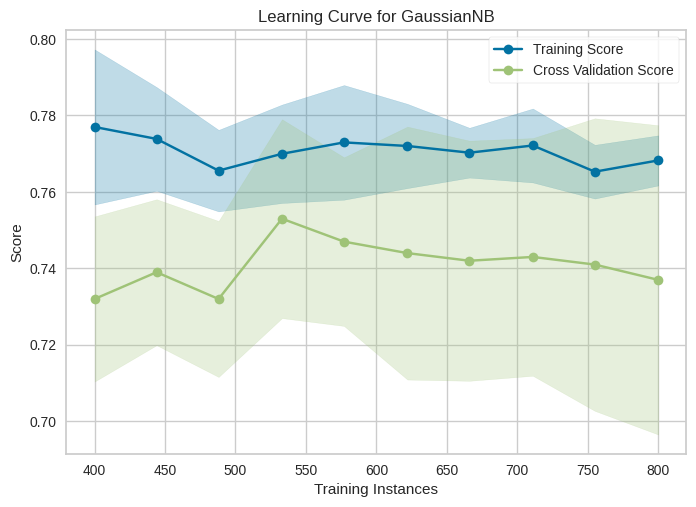

In [204]:
visualizer = LearningCurve(
    GaussianNB(var_smoothing=0.000000015), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_dummies, y).show()

In [205]:
new_gaus_nb = GaussianNB(var_smoothing=0.000000015).fit(X_train, y_train)

In [206]:
y_pred_new_gaus = new_gaus_nb.predict(X_test)

In [207]:
confusion_matrix(y_test, y_pred_new_gaus)

array([[ 36,  23],
       [ 25, 116]])

Хоть мы и нашли лучший гиперпараметр для нашей модели и общая точность модели увеличилась, но количество неверно классифицированных ненадёжных людей стало больше, что противоречит нашей бизнес-задаче. Найдём гиперпараметр по метрике confusion_matrix.

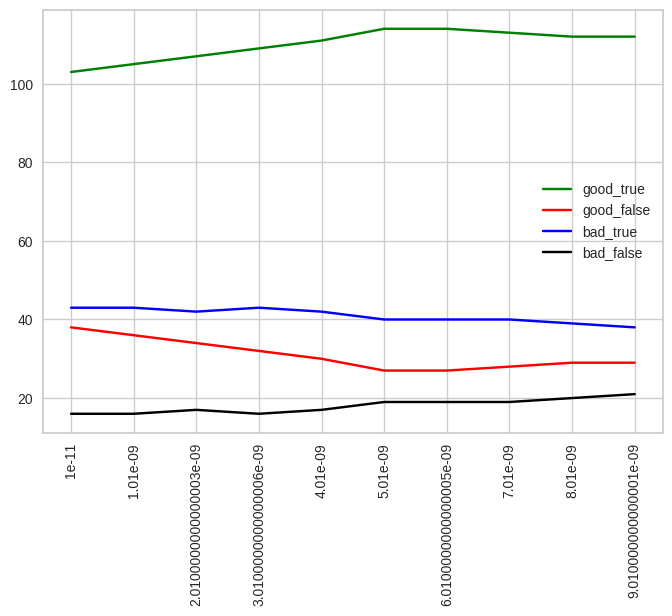

In [256]:
good_t_lst = []
good_f_lst = []
bad_t_lst = []
bad_f_lst = []
for i in np.arange(0.00000000001, 0.00000001, 0.000000001):
  gaus_nb = GaussianNB(var_smoothing=i).fit(X_train, y_train)
  y_pred = gaus_nb.predict(X_test)
  bad_t, bad_f, good_f, good_t = confusion_matrix(y_test, y_pred).ravel()
  good_t_lst.append(good_t)
  good_f_lst.append(good_f)
  bad_t_lst.append(bad_t)
  bad_f_lst.append(bad_f)

plt.plot(good_t_lst, label="good_true", c="green")
plt.plot(good_f_lst, label="good_false", c="red")
plt.plot(bad_t_lst, label="bad_true", c="blue")
plt.plot(bad_f_lst, label="bad_false", c="black")
plt.xticks(ticks=range(10), labels=np.arange(0.00000000001, 0.00000001, 0.000000001))
plt.xticks(rotation=90)
plt.legend()
plt.show()

Как мы видим, GaussianNB лучше всего определяет ненадёжных людей при значении гиперпараметра равном 3е-09 и стандартном 1е-09. Потому берём 3е-09, так как при нём также лучше определяются надёжные люди.

Проверяем на confusion_matrix:

In [267]:
gaus = GaussianNB(var_smoothing=0.000000003).fit(X_train, y_train)
pred = gaus.predict(X_test)
confusion_matrix(y_test, pred)

array([[ 43,  16],
       [ 32, 109]])

Строим кривую обучения:

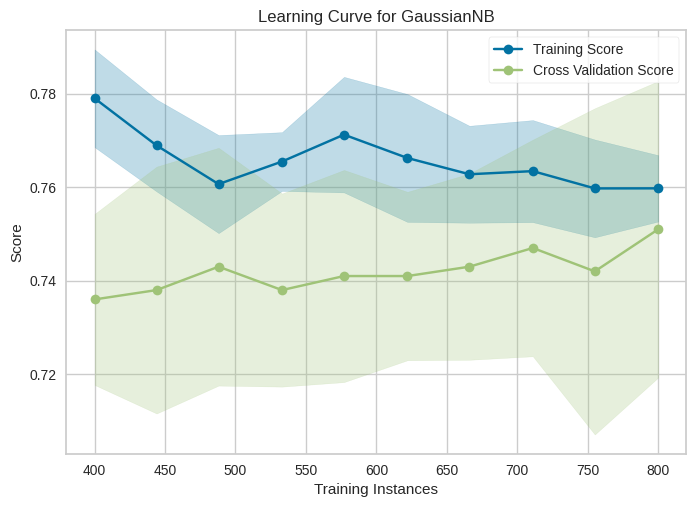

In [268]:
visualizer = LearningCurve(
    GaussianNB(var_smoothing=0.000000003), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_dummies, y).show()

# 7. Постройте ансамблевую модель машинного обучения.

In [269]:
gaus_nb = GaussianNB()
log_reg = LogisticRegression()
voting_clf = VotingClassifier(estimators=[("log_reg", log_reg), ("gaus_nb", gaus_nb)], voting="hard")
voting_clf.fit(X_train, y_train)
y_pred_en = voting_clf.predict(X_test)
confusion_matrix(y_test, y_pred_en)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 44,  15],
       [ 37, 104]])

Ансамблевая модель показывает такие же результаты для ненадёжных лиц, но более плохие для надёжных. Модель GaussianNB всё ещё остаётся лучшей из рассмотренных.

# Вывод по проделанной работе:    
В данной работе мы решали проблему классификации людей по надёжности, а именно надёжный человек или нет для выдачи ему кредита. Бизнес-задачей являлась классификация людей по данному критерию, и, что важно, отсеивание ненадёжных людей (что было для нас приоритетом, ввиду больших убытков при выдаче кредита таким лицам). Задачей же машинного обучения была бинарная классификация с упором на наименьший шанс определения ненадёжного человека как надёжного.    
Также, с помощью данной работы мы закрепили знания по таким темам как:    
1. Классификация;
2. Методы обучения с учителем;
3. Диагностика моделей машинного обучения;
4. Предобработка данных.